### step 2

In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.pipeline import Pipeline


Using TensorFlow backend.


In [2]:
seed = 7
np.random.seed(seed)


In [28]:
# load dataset
dataframe = pd.read_csv("iris.csv", header=None)
dataset = dataframe.values
X = dataset[:,0:4].astype(float)
Y = dataset[:,4]
le = LabelEncoder()
Y=le.fit_transform(dataset[:,4])

encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)


from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)

one_hot_train_labels=to_categorical(y_train)
one_hot_test_labels=to_categorical(y_test)

x_val=x_train[:25]
partial_x_train=x_train[25:]

y_val=one_hot_train_labels[:25]
partial_y_train=one_hot_train_labels[25:]


### step 3

In [11]:
def create_baseline():
    model=Sequential()
    model.add(Dense(8,activation='relu',input_shape=(4,)))
    model.add(Dense(3,activation='softmax'))
    model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
    
    #model.fit(partial_x_train,partial_y_train,epochs=5,validation_data=(x_val,y_val))
    return model

In [11]:
estimator = KerasClassifier(build_fn=create_baseline, epochs=200, batch_size=5, verbose=0)

### step 4

In [12]:
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Baseline: 97.33% (4.42%)


###  5.1

In [14]:
def create_small():
    model=Sequential()
    model.add(Dense(4,activation='relu',input_shape=(4,)))
    model.add(Dense(3,activation='softmax'))
    model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
    
    #model.fit(partial_x_train,partial_y_train,epochs=5,validation_data=(x_val,y_val))
    return model
estimator = KerasClassifier(build_fn=create_small, epochs=200, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


Baseline: 91.33% (11.18%)


## 5.2

In [ ]:
def create_large():
    model=Sequential()
    model.add(Dense(8,activation='relu',input_shape=(4,)))
    model.add(Dense(8,activation='relu'))
    model.add(Dense(8,activation='relu'))
    model.add(Dense(3,activation='softmax'))
    model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
    
    #model.fit(partial_x_train,partial_y_train,epochs=5,validation_data=(x_val,y_val))
    return model
estimator = KerasClassifier(build_fn=create_large, epochs=200, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


### 6

In [ ]:
def create_overfit():
    model=Sequential()
    model.add(Dense(64,activation='relu',input_shape=(4,)))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(3,activation='softmax'))
    model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
    
    #model.fit(partial_x_train,partial_y_train,epochs=5,validation_data=(x_val,y_val))
    return model
estimator = KerasClassifier(build_fn=create_overfit, epochs=300, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


### 7

In [14]:
def create_small():
    model=Sequential()
    model.add(Dense(8,activation='relu',input_shape=(4,)))
    model.add(Dropout(0.2))
    model.add(Dense(3,activation='softmax'))
    model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
    
    #model.fit(partial_x_train,partial_y_train,epochs=5,validation_data=(x_val,y_val))
    return model
estimator = KerasClassifier(build_fn=create_small, epochs=200, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


KeyboardInterrupt: 

### 8

In [14]:
import keras
inputs= keras.Input(shape=(4,))
x=Dense(8,activation='relu')(inputs)
x=Dense(8,activation='relu')(x)
outputs=Dense(3,activation='softmax')(x) 
model=keras.Model(inputs,outputs)
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])    
model.fit(partial_x_train,partial_y_train,epochs=100,validation_data=(x_val,y_val))


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 75 samples, validate on 25 samples
Epoch 1/100
75/75 [==============================] - 0s 4ms/step - loss: 1.1066 - acc: 0.5733 - val_loss: 0.9433 - val_acc: 0.6800
Epoch 2/100
75/75 [==============================] - 0s 67us/step - loss: 1.0036 - acc: 0.6667 - val_loss: 0.9132 - val_acc: 0.7200
Epoch 3/100
75/75 [==============================] - 0s 53us/step - loss: 0.9545 - acc: 0.6667 - val_loss: 0.8785 - val_acc: 0.7200
Epoch 4/100
75/75 [==============================] - 0s 53us/step - loss: 0.9069 - acc: 0.6667 - val_loss: 0.8573 - val_acc: 0.7200
Epoch 5/100
75/75 [==============================] - 0s 53us/step - loss: 0.8742 - acc: 0.6667 - val_loss: 0.8448 - val_acc: 0.7200
Epoch 6/100
75/75 [==============================] - 0s 67us/step - loss: 0.8525 - acc: 0.6667 - val_loss: 0.8302 - val_acc: 0.7200
Epoch 7/100
75/75 [==============================] - 0s 66us/step - lo

### 9

Train on 75 samples, validate on 25 samples
Epoch 1/200
75/75 [==============================] - 0s 3ms/step - loss: 1.2175 - acc: 0.3867 - val_loss: 1.1803 - val_acc: 0.2800
Epoch 2/200
75/75 [==============================] - 0s 66us/step - loss: 1.1690 - acc: 0.3867 - val_loss: 1.1552 - val_acc: 0.2800
Epoch 3/200
75/75 [==============================] - 0s 67us/step - loss: 1.1408 - acc: 0.3867 - val_loss: 1.1403 - val_acc: 0.2800
Epoch 4/200
75/75 [==============================] - 0s 67us/step - loss: 1.1183 - acc: 0.3867 - val_loss: 1.1179 - val_acc: 0.2800
Epoch 5/200
75/75 [==============================] - 0s 67us/step - loss: 1.0939 - acc: 0.3867 - val_loss: 1.0958 - val_acc: 0.2800
Epoch 6/200
75/75 [==============================] - 0s 67us/step - loss: 1.0712 - acc: 0.4000 - val_loss: 1.0738 - val_acc: 0.2800
Epoch 7/200
75/75 [==============================] - 0s 67us/step - loss: 1.0509 - acc: 0.4133 - val_loss: 1.0552 - val_acc: 0.3600
Epoch 8/200
75/75 [==============

75/75 [==============================] - 0s 67us/step - loss: 0.3435 - acc: 0.8267 - val_loss: 0.4188 - val_acc: 0.9200
Epoch 124/200
75/75 [==============================] - 0s 80us/step - loss: 0.3421 - acc: 0.9200 - val_loss: 0.4137 - val_acc: 0.9600
Epoch 125/200
75/75 [==============================] - 0s 67us/step - loss: 0.3396 - acc: 0.9600 - val_loss: 0.4101 - val_acc: 0.9600
Epoch 126/200
75/75 [==============================] - 0s 93us/step - loss: 0.3372 - acc: 0.9733 - val_loss: 0.4119 - val_acc: 0.9200
Epoch 127/200
75/75 [==============================] - 0s 66us/step - loss: 0.3360 - acc: 0.9467 - val_loss: 0.4120 - val_acc: 0.8800
Epoch 128/200
75/75 [==============================] - 0s 67us/step - loss: 0.3334 - acc: 0.8667 - val_loss: 0.4069 - val_acc: 0.9200
Epoch 129/200
75/75 [==============================] - 0s 67us/step - loss: 0.3313 - acc: 0.9067 - val_loss: 0.4016 - val_acc: 0.9600
Epoch 130/200
75/75 [==============================] - 0s 67us/step - loss: 

Epoch 184/200
75/75 [==============================] - 0s 67us/step - loss: 0.2420 - acc: 0.9733 - val_loss: 0.2858 - val_acc: 0.9600
Epoch 185/200
75/75 [==============================] - 0s 53us/step - loss: 0.2401 - acc: 0.9733 - val_loss: 0.2817 - val_acc: 1.0000
Epoch 186/200
75/75 [==============================] - 0s 80us/step - loss: 0.2399 - acc: 0.9733 - val_loss: 0.2784 - val_acc: 1.0000
Epoch 187/200
75/75 [==============================] - 0s 53us/step - loss: 0.2366 - acc: 0.9733 - val_loss: 0.2747 - val_acc: 1.0000
Epoch 188/200
75/75 [==============================] - 0s 80us/step - loss: 0.2349 - acc: 0.9733 - val_loss: 0.2678 - val_acc: 1.0000
Epoch 189/200
75/75 [==============================] - 0s 67us/step - loss: 0.2333 - acc: 0.9867 - val_loss: 0.2715 - val_acc: 1.0000
Epoch 190/200
75/75 [==============================] - 0s 53us/step - loss: 0.2324 - acc: 0.9733 - val_loss: 0.2720 - val_acc: 1.0000
Epoch 191/200
75/75 [==============================] - 0s 80us

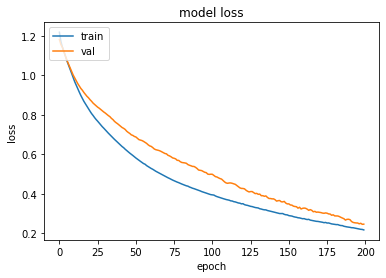

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
class MyModel(keras.Model):
    def __init__(self):
        super(MyModel,self).__init__()
        self.dense1=Dense(8,activation='relu')
        self.dense2=Dense(8,activation='relu')
        self.dense3=Dense(3,activation='softmax')
        
    def call(self,inputs):
        x=self.dense1(inputs)
        x=self.dense2(x)
        return self.dense3(x)
model=MyModel()
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])    
history=model.fit(partial_x_train,partial_y_train,epochs=200,validation_data=(x_val,y_val))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### 10

In [33]:
k=4
num_val_samples=len(X)//k
num_epochs=100
all_scores=[]

def create_model():
    model=Sequential()
    model.add(Dense(8,activation='relu',input_shape=(4,)))
    model.add(Dense(3,activation='softmax'))
    model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
    
    #model.fit(partial_x_train,partial_y_train,epochs=5,validation_data=(x_val,y_val))
    return model

for i in range(k):
    print('processing fold #', i)
    val_data = X[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = dummy_y[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([X[:i * num_val_samples],X[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([dummy_y[:i * num_val_samples],dummy_y[(i + 1) * num_val_samples:]],axis=0)
    model = create_model()
    model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=1)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=1)
    all_scores.append(val_mae)

processing fold # 0
Epoch 1/100
113/113 [==============================] - 1s 6ms/step - loss: 2.0752 - acc: 0.1150
Epoch 2/100
113/113 [==============================] - 0s 1ms/step - loss: 1.2801 - acc: 0.0973
Epoch 3/100
113/113 [==============================] - 0s 1ms/step - loss: 1.0735 - acc: 0.2212
Epoch 4/100
113/113 [==============================] - 0s 1ms/step - loss: 1.0288 - acc: 0.3628
Epoch 5/100
113/113 [==============================] - 0s 1ms/step - loss: 0.9906 - acc: 0.2920
Epoch 6/100
113/113 [==============================] - 0s 1ms/step - loss: 0.9761 - acc: 0.3894
Epoch 7/100
113/113 [==============================] - 0s 1ms/step - loss: 0.9582 - acc: 0.3363
Epoch 8/100
113/113 [==============================] - 0s 1ms/step - loss: 0.9413 - acc: 0.3363
Epoch 9/100
113/113 [==============================] - 0s 1ms/step - loss: 0.9345 - acc: 0.4159
Epoch 10/100
113/113 [==============================] - 0s 1ms/step - loss: 0.9210 - acc: 0.4336
Epoch 11/100
113/11

113/113 [==============================] - 0s 1ms/step - loss: 0.2199 - acc: 0.9646
Epoch 86/100
113/113 [==============================] - 0s 1ms/step - loss: 0.2182 - acc: 0.9646
Epoch 87/100
113/113 [==============================] - 0s 1ms/step - loss: 0.2201 - acc: 0.9646
Epoch 88/100
113/113 [==============================] - 0s 1ms/step - loss: 0.2113 - acc: 0.9735
Epoch 89/100
113/113 [==============================] - 0s 1ms/step - loss: 0.2029 - acc: 0.9558
Epoch 90/100
113/113 [==============================] - 0s 1ms/step - loss: 0.2006 - acc: 0.9646
Epoch 91/100
113/113 [==============================] - 0s 1ms/step - loss: 0.1982 - acc: 0.9558
Epoch 92/100
113/113 [==============================] - 0s 1ms/step - loss: 0.1953 - acc: 0.9558
Epoch 93/100
113/113 [==============================] - 0s 1ms/step - loss: 0.1917 - acc: 0.9823
Epoch 94/100
113/113 [==============================] - 0s 1ms/step - loss: 0.1897 - acc: 0.9558
Epoch 95/100
113/113 [=====================

113/113 [==============================] - 0s 1ms/step - loss: 0.1467 - acc: 0.9735
Epoch 69/100
113/113 [==============================] - 0s 1ms/step - loss: 0.1457 - acc: 0.9735
Epoch 70/100
113/113 [==============================] - 0s 1ms/step - loss: 0.1398 - acc: 0.9735
Epoch 71/100
113/113 [==============================] - 0s 1ms/step - loss: 0.1399 - acc: 0.9823
Epoch 72/100
113/113 [==============================] - 0s 1ms/step - loss: 0.1399 - acc: 0.9823
Epoch 73/100
113/113 [==============================] - 0s 1ms/step - loss: 0.1361 - acc: 0.9823
Epoch 74/100
113/113 [==============================] - 0s 1ms/step - loss: 0.1327 - acc: 0.9646
Epoch 75/100
113/113 [==============================] - 0s 1ms/step - loss: 0.1392 - acc: 0.9735
Epoch 76/100
113/113 [==============================] - 0s 1ms/step - loss: 0.1307 - acc: 0.9823
Epoch 77/100
113/113 [==============================] - 0s 1ms/step - loss: 0.1278 - acc: 0.9735
Epoch 78/100
113/113 [=====================

113/113 [==============================] - 0s 2ms/step - loss: 0.1515 - acc: 0.9646
Epoch 52/100
113/113 [==============================] - 0s 2ms/step - loss: 0.1530 - acc: 0.9646
Epoch 53/100
113/113 [==============================] - 0s 2ms/step - loss: 0.1451 - acc: 0.9646
Epoch 54/100
113/113 [==============================] - 0s 2ms/step - loss: 0.1416 - acc: 0.9646
Epoch 55/100
113/113 [==============================] - 0s 2ms/step - loss: 0.1460 - acc: 0.9735
Epoch 56/100
113/113 [==============================] - 0s 2ms/step - loss: 0.1373 - acc: 0.9735
Epoch 57/100
113/113 [==============================] - 0s 2ms/step - loss: 0.1404 - acc: 0.9735
Epoch 58/100
113/113 [==============================] - 0s 2ms/step - loss: 0.1367 - acc: 0.9735
Epoch 59/100
113/113 [==============================] - 0s 2ms/step - loss: 0.1325 - acc: 0.9646
Epoch 60/100
113/113 [==============================] - 0s 2ms/step - loss: 0.1299 - acc: 0.9646
Epoch 61/100
113/113 [=====================

113/113 [==============================] - 0s 1ms/step - loss: 0.2167 - acc: 0.9027
Epoch 35/100
113/113 [==============================] - 0s 1ms/step - loss: 0.2161 - acc: 0.8938
Epoch 36/100
113/113 [==============================] - 0s 1ms/step - loss: 0.2135 - acc: 0.8938
Epoch 37/100
113/113 [==============================] - 0s 1ms/step - loss: 0.2020 - acc: 0.9381
Epoch 38/100
113/113 [==============================] - 0s 1ms/step - loss: 0.1954 - acc: 0.9027
Epoch 39/100
113/113 [==============================] - 0s 1ms/step - loss: 0.1949 - acc: 0.9292
Epoch 40/100
113/113 [==============================] - 0s 1ms/step - loss: 0.1917 - acc: 0.9115
Epoch 41/100
113/113 [==============================] - 0s 1ms/step - loss: 0.1880 - acc: 0.9027
Epoch 42/100
113/113 [==============================] - 0s 1ms/step - loss: 0.1804 - acc: 0.9381
Epoch 43/100
113/113 [==============================] - 0s 1ms/step - loss: 0.1800 - acc: 0.9292
Epoch 44/100
113/113 [=====================

In [34]:
all_scores
np.mean(all_scores)

0.9256756764811438